In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('http://virtualfif.uaq.mx/diplomado/data/regresion/Poli/Employee_Salary.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [4]:
df.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [5]:
df.shape

(2000, 2)

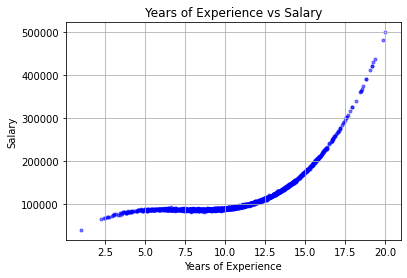

In [6]:
plt.title('Years of Experience vs Salary')
plt.scatter(df['Years of Experience'], df['Salary'], c = 'blue', marker='.', alpha = 0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

C:\Users\Tank3\.conda\envs\ML2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Years of Experience'>

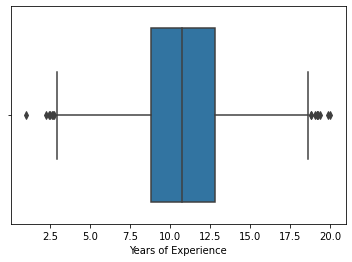

In [7]:
sbn.boxplot(df['Years of Experience'])

In [8]:
Q1 = df['Years of Experience'].quantile(0.25)
Q2 = df['Years of Experience'].quantile(0.50)
Q3 = df['Years of Experience'].quantile(0.75)
print(f'{Q1}, {Q2}, {Q3}')

8.81225469325, 10.738821909999999, 12.7854827525


In [9]:
IQR = Q3 - Q1
print(f'Rango intercuartílico: {IQR}')

Rango intercuartílico: 3.9732280592499993


In [10]:
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
print(f'{lower_fence}, {upper_fence}')

2.8524126043750018, 18.745324841374998


In [11]:
o_df = df[(df['Years of Experience'] < lower_fence) | (df['Years of Experience'] > upper_fence)]
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  16 non-null     float64
 1   Salary               16 non-null     float64
dtypes: float64(2)
memory usage: 384.0 bytes


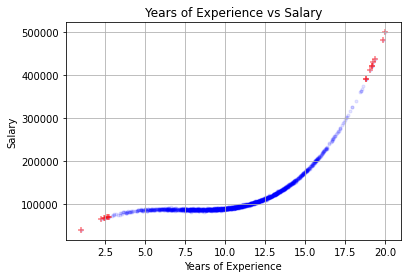

In [12]:
plt.title('Years of Experience vs Salary')
plt.scatter(df['Years of Experience'], df['Salary'], c = 'blue', marker='.', alpha = 0.1)
plt.scatter(o_df['Years of Experience'], o_df['Salary'], c = 'red', marker='+', alpha = 0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int((X.shape[0]*15)/100), random_state=0)

In [15]:
poli = PolynomialFeatures(degree = 3)
modelo = LinearRegression()

In [16]:
X_poly_train = poli.fit_transform(X_train)
modelo.fit(X_poly_train,y_train)

LinearRegression()

In [17]:
modelo.score(X_poly_train, y_train)

0.9991852307822301

In [18]:
X_poly_test = poli.fit_transform(X_test)

In [19]:
modelo.score(X_poly_test, y_test)

0.9992577703628953

In [20]:
y_pred = modelo.predict(X_poly_train)

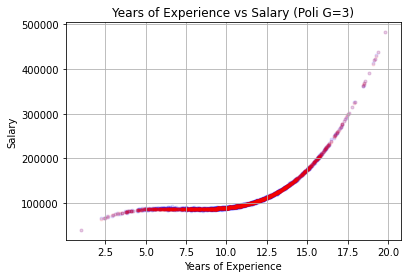

In [21]:
plt.title('Years of Experience vs Salary (Poli G=3)')
plt.scatter(X_train, y_train, c = 'blue', marker='.', alpha = 0.1)
plt.scatter(X_train, y_pred, c = 'red', marker='.', alpha = 0.1)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [22]:
y_pred = modelo.predict(X_poly_test)

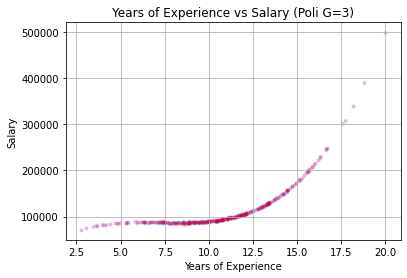

In [23]:
plt.title('Years of Experience vs Salary (Poli G=3)')
plt.scatter(X_test, y_test, c = 'blue', marker='.', alpha = 0.1)
plt.scatter(X_test, y_pred, c = 'red', marker='.', alpha = 0.1)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()